In [1]:
import numpy as np
import pandas as pd
import sys
import nltk
import re
import gensim
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from gensim import corpora,models
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud 

data=pd.read_csv('./abcnews-date-text.csv')
data=data['headline_text']
indices=np.random.permutation(np.arange(data.shape[0]))

# take 5000 news as input data
data_samples=data[indices[:5000]]
data=data[indices[:5000]]

cleanedData = []
# print(data)
lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in data:
    
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]

    
    cleanedData.append(text)
# print(cleanedData)

dictionary = corpora.Dictionary(cleanedData)
# print(dictionary)
# print(cleanedData)
corpus = [dictionary.doc2bow(text) for text in cleanedData]
# print(corpus)
print(dictionary[0])
print(dictionary[1])

13m
bribe


In [40]:
from pprint import pprint
models=[]
perplexities=[]
topics=[3,5,10,15,20,40,60,80,100,150,200]
for topic in topics:
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           num_topics=topic,
                                           id2word=dictionary)
    models.append(lda_model)
    perplexity=-lda_model.log_perplexity(corpus,total_docs=len(corpus))
    print('topic is {}\nPerplexity: {}'.format(topic,perplexity))
    perplexities.append(perplexity)

topic is 3
Perplexity: 3.470979993993586
topic is 5
Perplexity: 3.739722253246741
topic is 10
Perplexity: 4.1912797445600685
topic is 15
Perplexity: 4.783667867833918
topic is 20
Perplexity: 4.55482179061933
topic is 40
Perplexity: 5.78048807924444
topic is 60
Perplexity: 5.63394458456473
topic is 80
Perplexity: 5.994983146136457
topic is 100
Perplexity: 6.5673236575993625
topic is 150
Perplexity: 70.48938647883818
topic is 200
Perplexity: 265.04058236561036


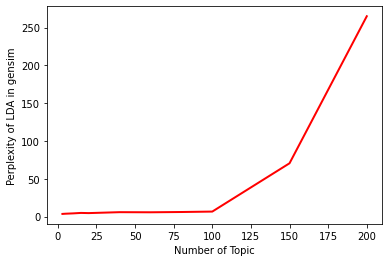

In [41]:
plt.plot(topics,perplexities,color="red",linewidth=2)
plt.xlabel("Number of Topic")
plt.ylabel("Perplexity of LDA in gensim")
plt.show()

In [12]:
%matplotlib inline
# Because the log_perplexity showed in gensim is strange, not accord with our intuition, so we can use pyLDAvis to visualize the model 
from IPython.core.display import HTML
import pyLDAvis
import pyLDAvis.gensim
from IPython.display import HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(models[2], corpus, dictionary)
pyLDAvis.save_html(vis, 'vis.html')
pyLDAvis.display(vis)

In [20]:
documents = [
    ['The sky is blue and beautiful.'],
    ['Love this blue and beautiful sky!'],        
    ['The quick brown fox jumps over the lazy dog.'],        
    ["A king's breakfast has sausages, ham, bacon, eggs, toast and beans"],        
    ['I love green eggs, ham, sausages and bacon!'],        
    ['The brown fox is quick and the blue dog is lazy!'],        
    ['The sky is very blue and the sky is very beautiful today'],        
    ['The dog is lazy but the brown fox is quick!']        
]

topic_names = ['food', 'weather', 'animals']
cleanedData = []
# print(data)
lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in documents:
    text=str(text)
#     print(text)
   
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]

    
    cleanedData.append(text)
# print(cleanedData)

dictionary = corpora.Dictionary(cleanedData)
# print(dictionary)
# print(cleanedData)
corpus = [dictionary.doc2bow(text) for text in cleanedData]


In [36]:
from pprint import pprint
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           num_topics=3,
                                           id2word=dictionary)
pprint(lda_model.print_topics())

[(0,
  '0.109*"sky" + 0.064*"beautiful" + 0.063*"blue" + 0.063*"sausage" + '
  '0.063*"bacon" + 0.062*"bean" + 0.062*"egg" + 0.062*"king" + 0.062*"ham" + '
  '0.062*"ha"'),
 (1,
  '0.122*"quick" + 0.122*"dog" + 0.121*"lazy" + 0.121*"fox" + 0.120*"brown" + '
  '0.086*"blue" + 0.050*"sky" + 0.049*"beautiful" + 0.048*"jump" + '
  '0.014*"love"'),
 (2,
  '0.131*"love" + 0.080*"blue" + 0.079*"sky" + 0.078*"beautiful" + 0.077*"ham" '
  '+ 0.076*"egg" + 0.076*"sausage" + 0.076*"bacon" + 0.076*"green" + '
  '0.024*"brown"')]


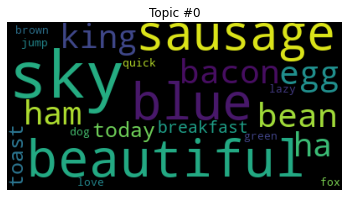

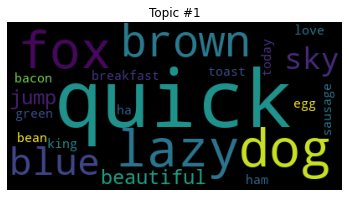

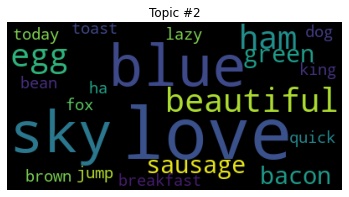

In [37]:
from wordcloud import WordCloud
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [42]:
simu_data=pd.read_excel("simulation data.xlsx",  names = ['title','content'])
simu_data['all']=simu_data['title']+' '+simu_data['content']

# used for simulation data
cleanedData = []
# print(data)
lemma = WordNetLemmatizer()
swords = stopwords.words("english")
for text in simu_data['all']:
    
    # Cleaning links
    text = re.sub(r'http\S+', '', text)
    
    # Cleaning everything except alphabetical and numerical characters
    text = re.sub("[^a-zA-Z0-9]"," ",text)
    
    # Tokenizing and lemmatizing
    text = nltk.word_tokenize(text.lower())
    text = [lemma.lemmatize(word) for word in text]
    
    # Removing stopwords
    text = [word for word in text if word not in swords]

    
    cleanedData.append(text)
# print(cleanedData)

dictionary = corpora.Dictionary(cleanedData)
# print(dictionary)
# print(cleanedData)
corpus = [dictionary.doc2bow(text) for text in cleanedData]

present_words=[]
docs = []
for doc in corpus:
    present_words=[]
    for j in doc:
        present_words.append(j[0])
    docs.append(present_words)
# print(docs)

[['course', 'page', 'canvas', 'canvas', 'used', 'submitting', 'homework', 'final', 'report', 'publishing', 'grade'], ['ta', 'two', 'ta'], ['ta', 'lead', 'ta', 'xiner', 'zhou', 'xezhou', 'ucdavis', 'edu', 'role', 'monitoring', 'piazza', 'holding', 'office', 'hour', 'leading', 'discussion', 'session'], ['ta', 'ta', 'jing', 'lyu', 'jjlyu', 'ucdavis', 'edu', 'role', 'grading', 'homework', 'question', 'regarding', 'homework', 'grade', 'please', 'contact', 'directly'], ['office', 'hour', 'zoom', 'instructor', 'every', 'monday', '2', '00pm', '4', '00pm', 'zoom', 'link', 'password', 'sta208oh'], ['office', 'hour', 'zoom', 'lead', 'ta', 'every', 'thursday', '3', '00pm', '5', '00pm', 'zoom', '984', '5429', '7603', 'password', '208'], ['office', 'hour', 'zoom', 'discussion', 'session', 'used', 'additional', 'office', 'hour'], ['waitlist', 'unfortunately', 'going', 'increase', 'class', 'size', 'class', 'ha', 'long', 'waitlist', 'decide', 'want', 'take', 'class', 'please', 'drop', 'immediately', 'm

In [51]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           num_topics=5,
                                           id2word=dictionary)
pprint(lda_model.print_topics())

[(0,
  '0.026*"hour" + 0.024*"zoom" + 0.024*"office" + 0.019*"ta" + 0.016*"00pm" + '
  '0.012*"2" + 0.010*"classification" + 0.010*"password" + 0.009*"discussion" '
  '+ 0.009*"used"'),
 (1,
  '0.020*"homework" + 0.020*"code" + 0.015*"cite" + 0.015*"conduct" + '
  '0.013*"assignment" + 0.012*"exam" + 0.012*"note" + 0.011*"course" + '
  '0.011*"someone" + 0.010*"piazza"'),
 (2,
  '0.026*"material" + 0.021*"ta" + 0.015*"course" + 0.014*"hour" + 0.012*"sta" '
  '+ 0.010*"homework" + 0.010*"conduct" + 0.009*"main" + 0.009*"reference" + '
  '0.009*"office"'),
 (3,
  '0.030*"course" + 0.022*"method" + 0.015*"bayesian" + 0.013*"academic" + '
  '0.013*"material" + 0.012*"tentative" + 0.012*"outline" + 0.012*"topic" + '
  '0.011*"student" + 0.010*"regression"'),
 (4,
  '0.022*"question" + 0.014*"please" + 0.014*"learning" + 0.013*"note" + '
  '0.012*"post" + 0.012*"homework" + 0.012*"learn" + 0.012*"student" + '
  '0.012*"method" + 0.011*"statistical"')]


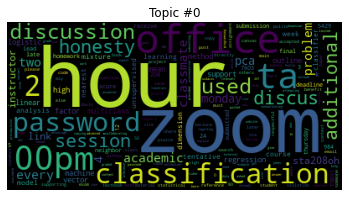

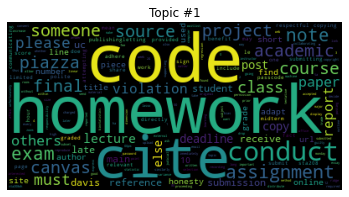

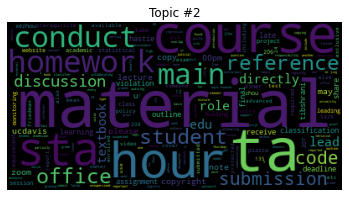

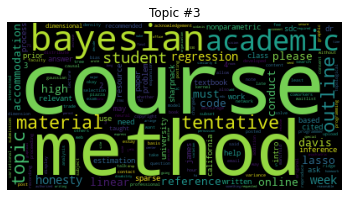

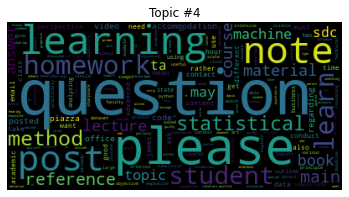

In [52]:
from wordcloud import WordCloud
for t in range(lda_model.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda_model.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.show()

In [53]:
%matplotlib inline
# Because the log_perplexity showed in gensim is strange, not accord with our intuition, so we can use pyLDAvis to visualize the model 
from IPython.core.display import HTML
import pyLDAvis
import pyLDAvis.gensim
from IPython.display import HTML
css_str = '<style> \
.jp-Button path { fill: #616161;} \
text.terms { fill: #616161;} \
</style>'
display(HTML(css_str ))
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'simu_data.html')
pyLDAvis.display(vis)